In [2]:
######################################### Load Libraries and Data #########################################

# To write a Python 2/3 compatible codebase, the first step is to add this line to the top of each module
from __future__ import division, print_function, unicode_literals

# Import necessary libraries and modules 
# Matplotlib inline allows the output of plotting commands will be displayed inline
%matplotlib inline                      
from sklearn import linear_model        # The sklearn.linear_model module implements generalized linear models. LR is part of this module
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn import neighbors, datasets

,ID,M_Radius,M_Texture,M_Perimeter,M_Area,M_Smoothness,M_Compactness,M_Concavity,M_Concave_Points,M_Symmetry,...,W_Radius,W_Texture,W_Perimeter,W_Area,W_Smoothness,W_Compactness,W_Concavity,W_Concave_Points,W_Symmetry,W_FDimension
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
col_names = ["ID", "Diagnosis", "M_Radius", "M_Texture", "M_Perimeter", "M_Area", "M_Smoothness", "M_Compactness", "M_Concavity",
            "M_Concave_Points", "M_Symmetry","M_FDimension","SE_Radius", "SE_Texture", "SE_Perimeter", "SE_Area", "SE_Smoothness", 
            "SE_Compactness", "SE_Concavity","SE_Concave_Points", "SE_Symmetry","SE_FDimension", "W_Radius", "W_Texture", 
            "W_Perimeter", "W_Area", "W_Smoothness", "W_Compactness", "W_Concavity","W_Concave_Points", "W_Symmetry",
            "W_FDimension"]

cancerdata= pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', names = col_names)


cancerdata.describe()

In [3]:
#Create a correlation matrix#
corrmatrix = cancerdata.corr()
corrmatrix

,ID,M_Radius,M_Texture,M_Perimeter,M_Area,M_Smoothness,M_Compactness,M_Concavity,M_Concave_Points,M_Symmetry,...,W_Radius,W_Texture,W_Perimeter,W_Area,W_Smoothness,W_Compactness,W_Concavity,W_Concave_Points,W_Symmetry,W_FDimension
ID,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
M_Radius,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
M_Texture,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
M_Perimeter,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
M_Area,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
M_Smoothness,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
M_Compactness,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
M_Concavity,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
M_Concave_Points,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
M_Symmetry,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


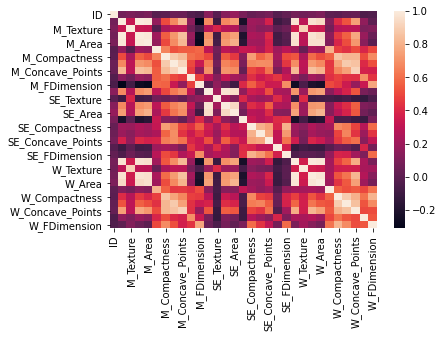

In [4]:
#Heatmap for illustration purposes 
sn.heatmap(corrmatrix, annot=False)
plt.show()

In [6]:
#Specify Targets and Attributes#
X = cancerdata.values[:, 2:31]          
y = cancerdata.values[:,1] 

attributes = cancerdata.columns
attributes = attributes.drop(["Diagnosis","ID"])
attributes

Index(['M_Radius', 'M_Texture', 'M_Perimeter', 'M_Area', 'M_Smoothness',
       'M_Compactness', 'M_Concavity', 'M_Concave_Points', 'M_Symmetry',
       'M_FDimension', 'SE_Radius', 'SE_Texture', 'SE_Perimeter', 'SE_Area',
       'SE_Smoothness', 'SE_Compactness', 'SE_Concavity', 'SE_Concave_Points',
       'SE_Symmetry', 'SE_FDimension', 'W_Radius', 'W_Texture', 'W_Perimeter',
       'W_Area', 'W_Smoothness', 'W_Compactness', 'W_Concavity',
       'W_Concave_Points', 'W_Symmetry', 'W_FDimension'],
      dtype='object')

In [ ]:
###################################### Confusion Matrix #####################################


# Function that prints and plots the confusion matrix.
# Normalization can be applied by setting `normalize=True` (see below for examples)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
############################################    Split the Data   ############################################

# Split validation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1, stratify=y)

The weights of the attributes are: [[-1.14 -0.41 -0.18  0.01  0.04  0.19  0.27  0.11  0.05  0.01 -0.04 -0.38
   0.11  0.09  0.01  0.04  0.06  0.02  0.02  0.   -1.13  0.46  0.19  0.02
   0.07  0.58  0.73  0.21  0.2 ]]
B [0.99 0.01] 1.0
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       143
           1       0.90      0.92      0.91        85

    accuracy                           0.93       228
   macro avg       0.92      0.93      0.93       228
weighted avg       0.93      0.93      0.93       228

Confusion matrix, without normalization
[[134   9]
 [  7  78]]
Normalized confusion matrix
[[0.94 0.06]
 [0.08 0.92]]


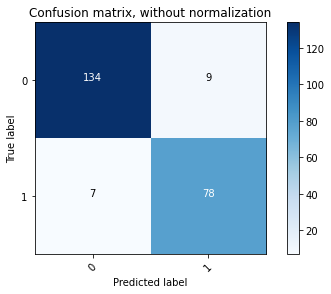

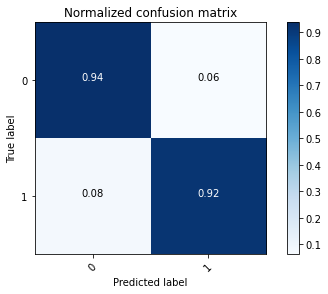

In [31]:
###Logistic Regression with Split Validation###


#################################### Train the Logistic Regression Model ####################################

# We create an instance of the Classifier
# Logistic Regression (aka logit) classifier.

clf = linear_model.LogisticRegression(multi_class='ovr', #accomondates multi-class categorical target variable
                                      C=1, penalty = 'l2') 
                                             # C parameter is the inverse of regularization strength
                                             # C must be a positive float
                                             # C in this case is 1/lambda
                                             # Smaller values specify stronger regularization
                                             # Applies regularization by default; you can set C very large to avoid regularization (setting penalty l2 can speed up the estimations with a very large C)
# Train the model (fit the data)
# As with other classifiers, DecisionTreeClassifier takes as input two arrays: an array X, sparse or dense, 
# of size [n_samples, n_features] holding the training samples, and an array Y of integer values, size [n_samples], 
# holding the class labels for the training samples:
clf = clf.fit(X_train, y_train)
print('The weights of the attributes are:', clf.coef_)


#################################### Apply the Logistic Regression Model ####################################

y_pred = clf.predict(X_test)             # Classification prediction
y_pred_prob = clf.predict_proba(X_test)  # Class probabilities
print(y_pred[0], y_pred_prob[0], np.sum(y_pred_prob[0]))

################################### Evaluate the Logistic Regression Model ##################################


# Build a text report showing the main classification metrics (out-of-sample performance)
print(classification_report(y_test, y_pred, target_names=["0","1"]))


                    

In [ ]:
# Compute confusion matrix to evaluate the accuracy of a classification    
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

    
#cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["0","1"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["0","1"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [30]:
### Logistic Regression with Cross Validation###

# Fit model to all the data
clf_lr = linear_model.LogisticRegression(multi_class='ovr',
                                         C=1, penalty = 'l2') 
clf = clf.fit(X_train, y_train)
print('The weights of the attributes are:', clf.coef_)
# Evaluate performance with cross-validation
# Read more about cross_val_score in the following link 
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score

# Accuracy
scores=cross_val_score(clf_lr, X, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

# F-1 scores
scores_f1=cross_val_score(clf_lr, X, y, cv=10, scoring='f1_macro')
print("F1-score: %0.2f (+/- %0.2f)" % (scores_f1.mean(), scores_f1.std() * 2))# returns an array of scores of the estimator for each run of the cross validation.
print(scores_f1)

print(classification_report(y_test, y_pred, target_names=["0","1"]))



The weights of the attributes are: [[-1.14 -0.41 -0.18  0.01  0.04  0.19  0.27  0.11  0.05  0.01 -0.04 -0.38
   0.11  0.09  0.01  0.04  0.06  0.02  0.02  0.   -1.13  0.46  0.19  0.02
   0.07  0.58  0.73  0.21  0.2 ]]
Accuracy: 0.94 (+/- 0.04)
[0.93 0.93 0.95 0.93 0.95 0.96 0.96 0.91 0.93 0.96]
F1-score: 0.94 (+/- 0.04)
[0.92 0.92 0.94 0.92 0.94 0.96 0.96 0.91 0.93 0.96]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       143
           1       0.98      0.93      0.95        85

    accuracy                           0.96       228
   macro avg       0.97      0.96      0.96       228
weighted avg       0.97      0.96      0.96       228



In [ ]:
#Standardize#
sc = StandardScaler()
sc.fit(X_train) # Compute the mean and std to be used for later scaling.

X_train_std = sc.transform(X_train) # Perform standardization of train set X by centering and scaling
X_test_std = sc.transform(X_test)

Accuracy (out-of-sample): 0.96
Accuracy (in-sample): 0.98
F1 score (out-of-sample):  0.9621105110095555
F1 score (in-sample)    :  0.9809907834101382
Kappa score (out-of-sample):  0.924246199850486
Kappa score (in-sample)    :  0.9619942787086229
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       143
           1       0.98      0.93      0.95        85

    accuracy                           0.96       228
   macro avg       0.97      0.96      0.96       228
weighted avg       0.97      0.96      0.96       228

Confusion matrix, without normalization
[[141   2]
 [  6  79]]
Normalized confusion matrix
[[0.99 0.01]
 [0.07 0.93]]


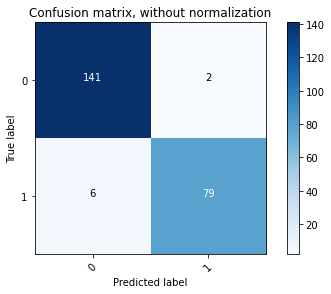

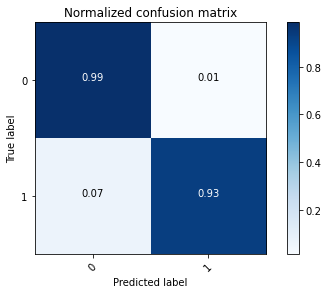

In [25]:
############################################# Train the Model #############################################

from sklearn import neighbors, datasets

# Set parameters of KNeighborsClassifier
knn = neighbors.KNeighborsClassifier(n_neighbors=3, #n_neighbors is the k in the kNN
                           p=2, 
                           metric='minkowski',leaf_size = 50, algorithm = 'kd_tree') 
# Train the model      
knn = knn.fit(X_train_std, y_train)  

############################################# Evaluate the Model #############################################

# The sklearn.metrics module includes score functions, performance metrics and pairwise metrics 
# and distance computations.
# https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report, confusion_matrix

# Estimate the predicted values by applying the kNN algorithm
y_pred = knn.predict(X_test_std)
y_pred_insample = knn.predict(X_train_std)

# Accuracy
print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy (in-sample): %.2f' % accuracy_score(y_train, y_pred_insample))

# F1 score
print('F1 score (out-of-sample): ', f1_score(y_test, y_pred, average='macro'))
print('F1 score (in-sample)    : ', f1_score(y_train, y_pred_insample, average='macro'))

# Kappa score
print('Kappa score (out-of-sample): ', cohen_kappa_score(y_test, y_pred))
print('Kappa score (in-sample)    : ', cohen_kappa_score(y_train, y_pred_insample))

# Build a text report showing the main classification metrics (out-of-sample performance)
print(classification_report(y_test, y_pred, target_names=["0","1"]))



                    

In [ ]:
# Compute confusion matrix to evaluate the accuracy of a classification    
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

    
#cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["0","1"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["0","1"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()